<a href="https://colab.research.google.com/github/daffavcd/PCVK-2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Changing brightness level
---------------------------------
insert brightnesses value [-255 - 255] :60
insert contrast value [1.0 - 3.0] :1.5
---------------------------------
insert brightnesses value [-255 - 255] :40


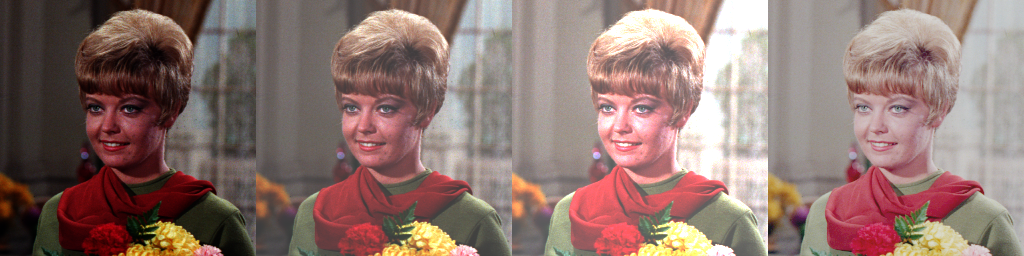

In [45]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import math
from PIL import Image

print('Changing brightness level')
print('---------------------------------')

try:
  brightness = int(input('insert brightnesses value [-255 - 255] :'))
  contrast = float(input('insert contrast value [1.0 - 3.0] :'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ImagesCV/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#access every pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c]= np.clip(original[y,x,c] + brightness,0,255)

#CONTRAST (TUGAS 1)
contrast_image = np.zeros(brightness_image.shape, brightness_image.dtype)

for y in range(brightness_image.shape[0]):
  for x in range(brightness_image.shape[1]):
    for c in range(brightness_image.shape[2]):
       contrast_image[y,x,c]= np.clip(contrast*brightness_image[y,x,c],0,255)

#LOGARITHMIC (TUGAS 2)
print('---------------------------------')
try:
  log_brightness = int(input('insert brightnesses value [-255 - 255] :'))
except ValueError:
  print('Error, not a number')

logarithmic_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
       logarithmic_image[y,x,c]= np.clip(log_brightness * (np.log(1 + original[y,x,c])), 0, 255)



#simple without loop
# brightness_image = cv.convertScaleAbs(original,beta=brightness)

final_frame = cv.hconcat((original,brightness_image,contrast_image,logarithmic_image))
cv2_imshow(final_frame)

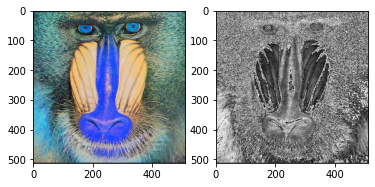

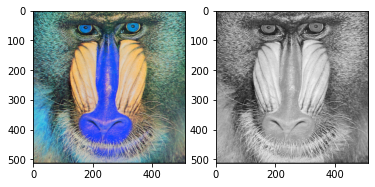

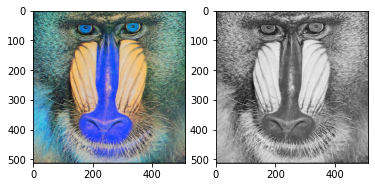

In [46]:
import matplotlib.pyplot as plt
originalMonkey = cv.imread('/content/drive/MyDrive/ImagesCV/mandrill.tiff')

#AVERAGING (TUGAS 3A)

R,G,B = originalMonkey[:,:,0],originalMonkey[:,:,1],originalMonkey[:,:,2],

gray_img = (R+G+B)/3

#Create 2 Plot
f, axarr=plt.subplots(1,2)
axarr[0].imshow(originalMonkey)
axarr[1].imshow(gray_img,cmap='gray')

#LIGHTNESS (TUGAS 3B)

R,G,B = originalMonkey[:,:,0],originalMonkey[:,:,1],originalMonkey[:,:,2],
max_channels = np.maximum(np.maximum(R,G),B) #np.max(originalMonkey,axis=2)
min_channels = np.minimum(np.minimum(R,G),B) #np.min(originalMonkey,axis=2)

gray_img = max_channels/2 + min_channels/2

#Create 2 Plot
f, axarr=plt.subplots(1,2)
axarr[0].imshow(originalMonkey)
axarr[1].imshow(gray_img,cmap='gray')

#LUMINANCE (TUGAS 3C)

R,G,B = originalMonkey[:,:,0],originalMonkey[:,:,1],originalMonkey[:,:,2],

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

#Create 2 Plot
f, axarr=plt.subplots(1,2)
axarr[0].imshow(originalMonkey)
axarr[1].imshow(gray_img,cmap='gray')

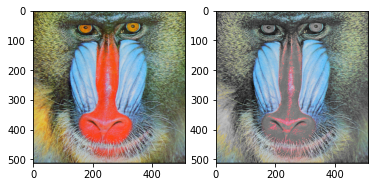

In [47]:
#SELECTED GRAYSCALE (TUGAS 4)
ori_rgb = cv.cvtColor(originalMonkey, cv.COLOR_BGR2RGB)
blue, mask = cv.threshold(originalMonkey[:,:,0], 100, 255, cv.THRESH_BINARY)

new_mask = np.zeros_like(originalMonkey)
new_mask[:,:,0] = mask
new_mask[:,:,1] = mask
new_mask[:,:,2] = mask

blue = cv.bitwise_and(ori_rgb, new_mask)

gray = cv.cvtColor(originalMonkey, cv.COLOR_BGR2GRAY)
originalMonkey = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(originalMonkey, 255 - new_mask)
out = gray + blue

fig, ax = plt.subplots(1,2)
ax[0].imshow(ori_rgb)
ax[1].imshow(out, cmap='gray')